<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [5]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import imp

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [671]:
sat_filepath = '../../../DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [672]:
d = pd.read_csv(sat_filepath)
d.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [673]:
d.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [678]:
d_dict = {'Math' : 'float','Verbal': 'float','Rate':'float', 'State':'str','data_shape' : d.shape}
d_dict


{'Math': 'float',
 'Rate': 'float',
 'State': 'str',
 'Verbal': 'float',
 'data_shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

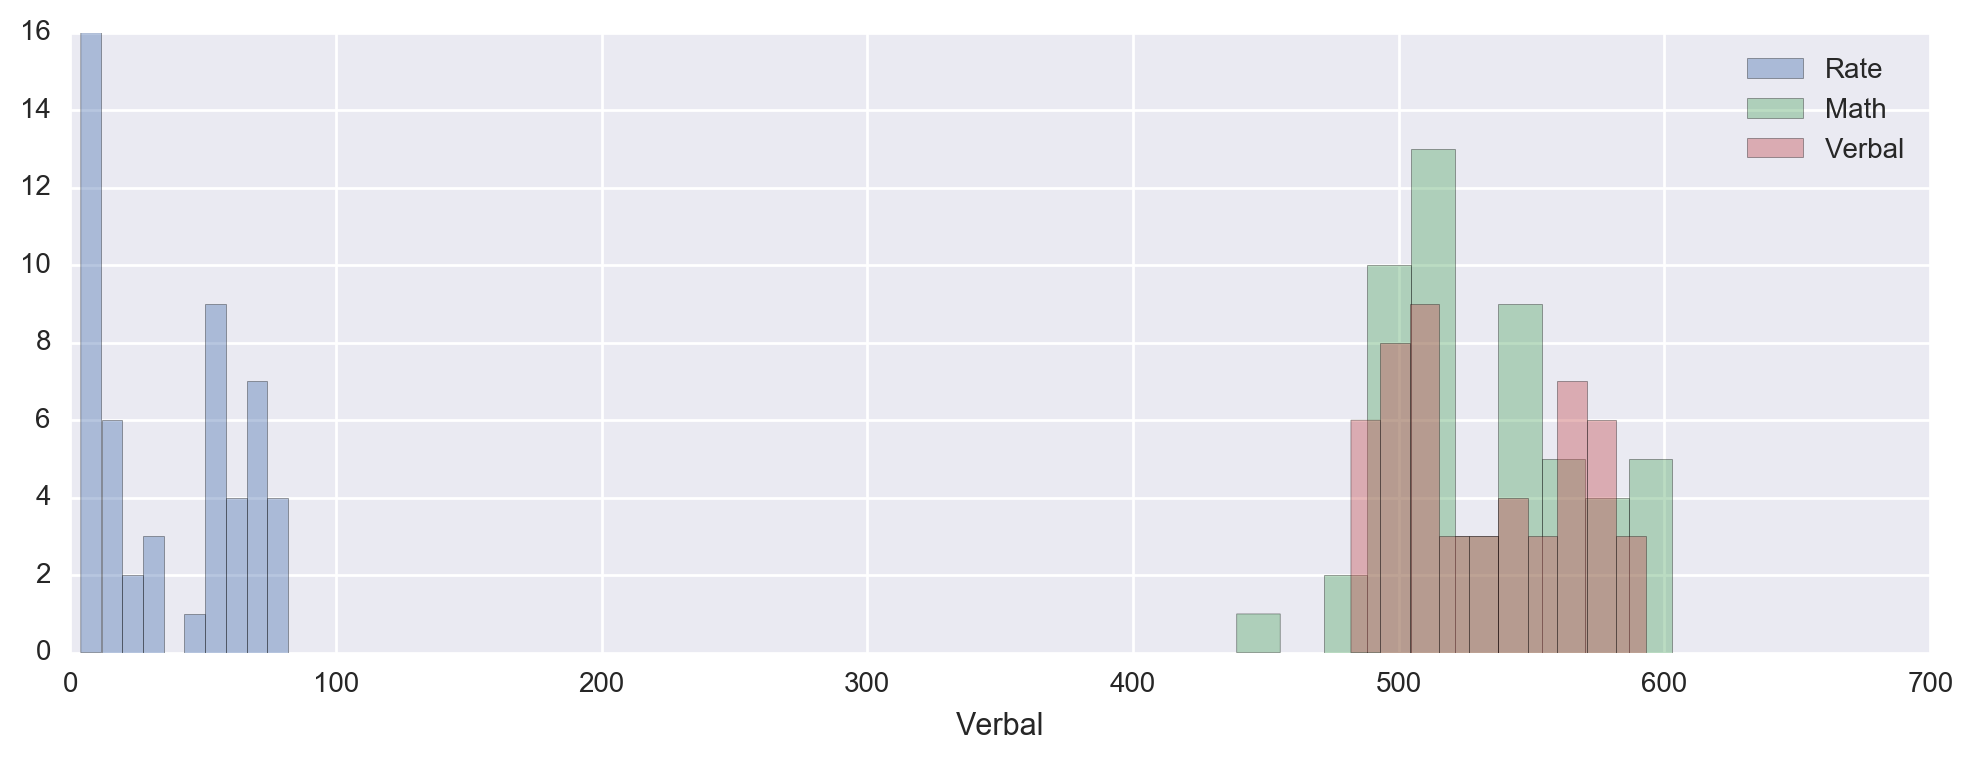

In [675]:

fig,ax = plt.subplots(1,1,figsize=(12,4))

sns.distplot(d.Rate, kde=False, bins=10,ax=ax,label='Rate')
sns.distplot(d.Math,kde=False,bins=10,ax=ax, label='Math')
sns.distplot(d.Verbal,kde=False,bins=10,ax=ax,label='Verbal')

ax.legend(loc='upper right')

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

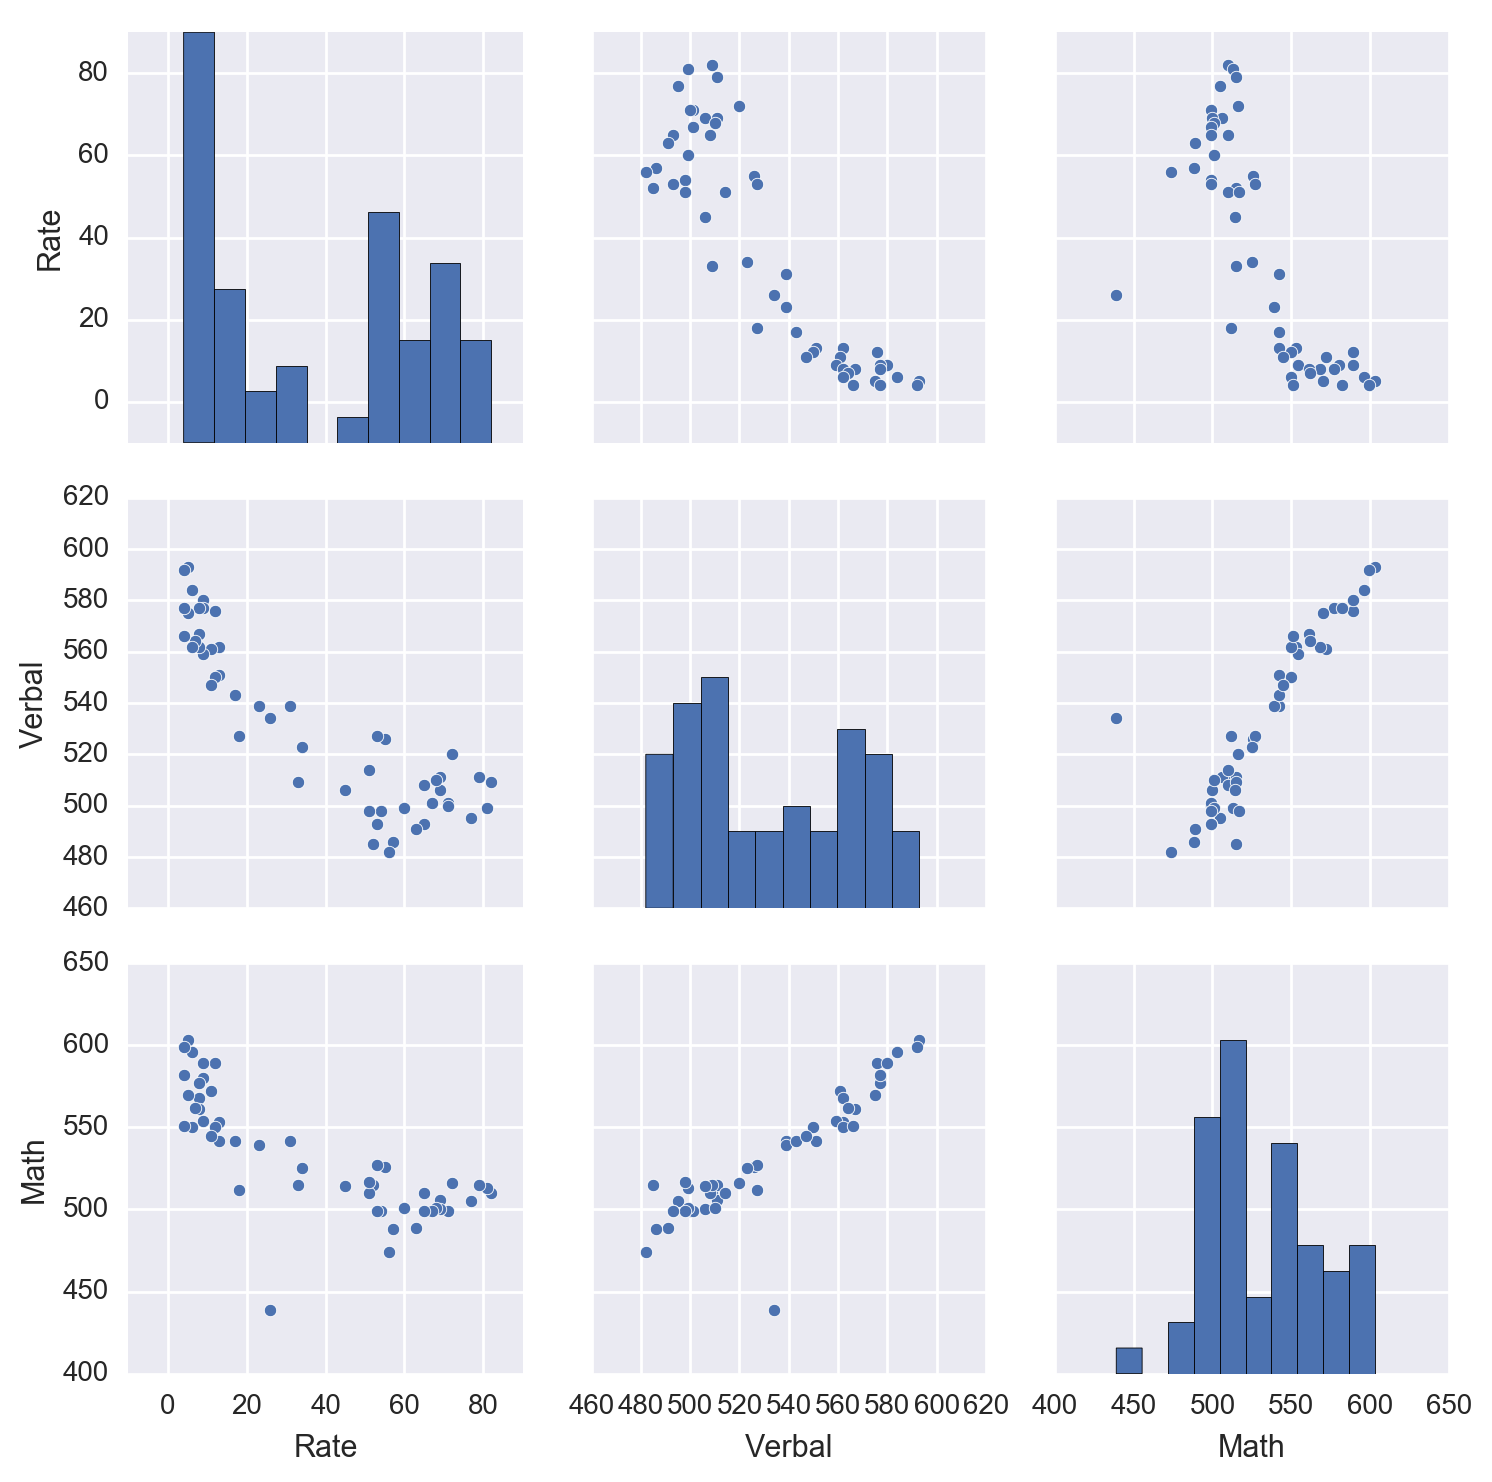

In [60]:
sns.pairplot(d)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

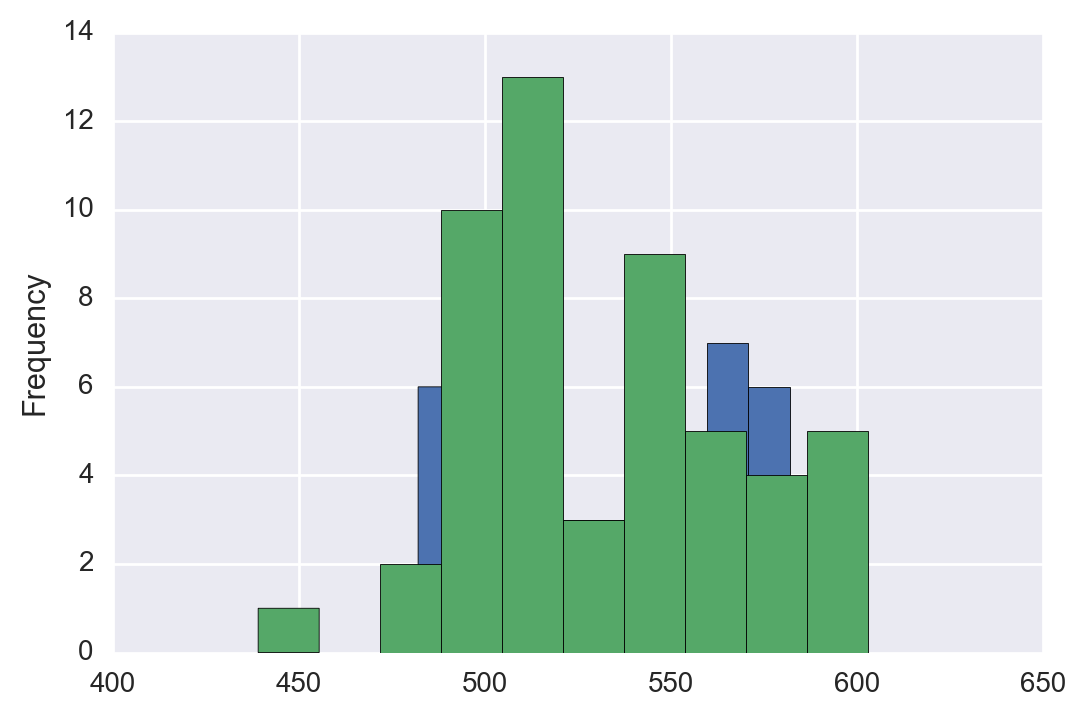

In [68]:
d.Verbal.plot.hist()
d.Math.plot.hist()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

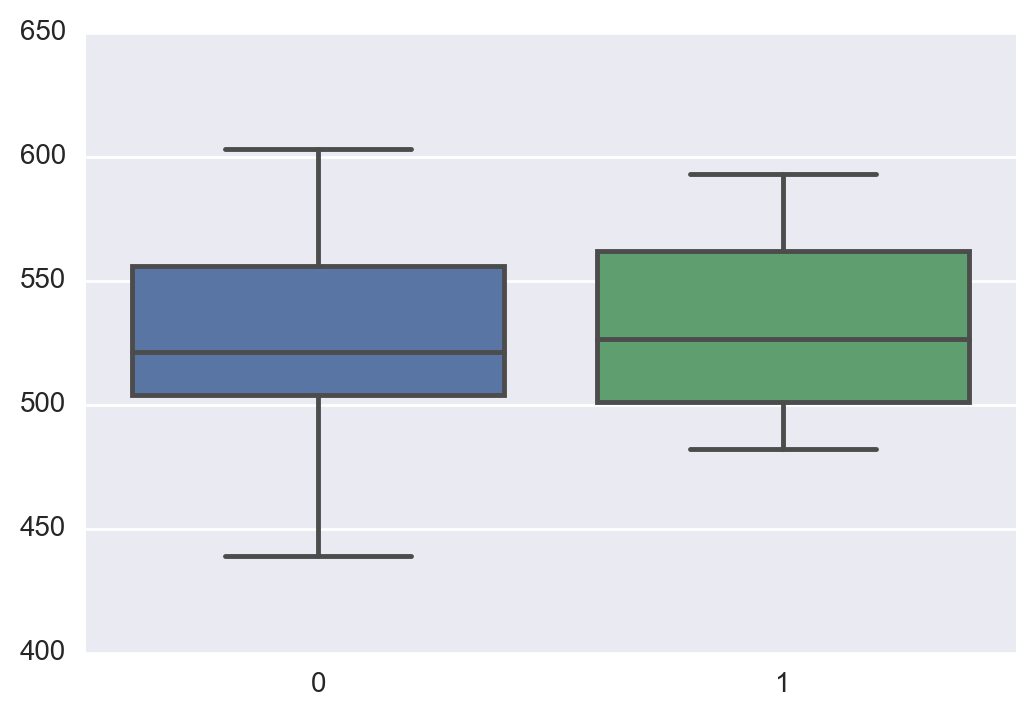

In [69]:
sns.boxplot(data = [d.Math,d.Verbal])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


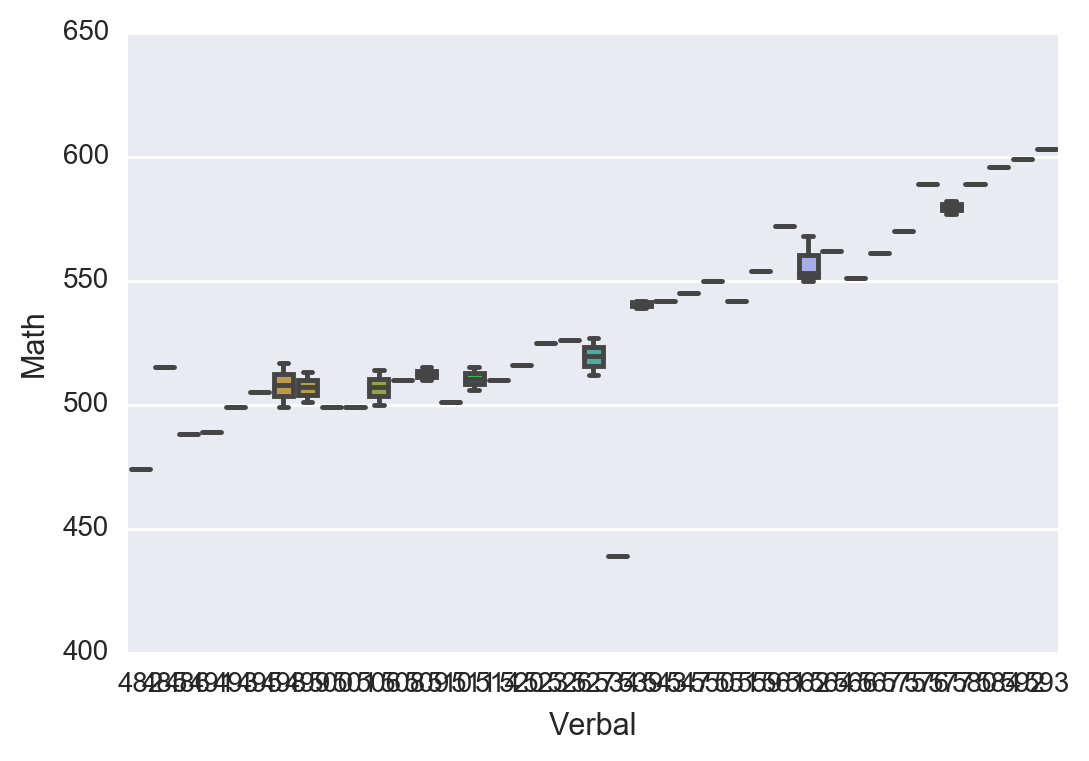

In [70]:
sns.boxplot(x=d.Verbal,y=d.Math)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [78]:
d.State[d.Verbal > d.Verbal.mean()]


26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [81]:
d.State[d.Verbal > d.Verbal.median()]


19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [82]:
print 'mean of verval:',d.Verbal.mean(),'median of verval:',d.Verbal.median()

mean of verval: 532.019230769 median of verval: 526.5


In [ ]:
# 
# mean > median, it's right skewd, the difference between number of states is states between mean and median


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [95]:
d['Verbal_Math_Diff'] = d.Verbal - d.Math
d

,State,Rate,Verbal,Math,Verbal_Math_Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [96]:
d2 = d.sort_values('Verbal_Math_Diff').reset_index()


In [108]:
d2.head(52)

,index,State,Rate,Verbal,Math,Verbal_Math_Diff
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14
3,33,IL,12,576,589,-13
4,44,WI,6,584,596,-12
5,36,MI,11,561,572,-11
6,3,NY,77,495,505,-10
7,47,IA,5,593,603,-10
8,37,MN,9,580,589,-9
9,51,All,45,506,514,-8


In [103]:
d_max10 = d2[:10]
d_max10.head(3)


,index,State,Rate,Verbal,Math,Verbal_Math_Diff
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


In [110]:
d_min10 = d2[-10:].sort_values('Verbal_Math_Diff',ascending= False)
d_min10.head(3)

,index,State,Rate,Verbal,Math,Verbal_Math_Diff
51,27,OH,26,534,439,95
49,29,WV,18,527,512,15
50,50,MS,4,566,551,15


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [111]:
d.corr()

,Rate,Verbal,Math,Verbal_Math_Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal_Math_Diff,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [113]:
d.describe()
#count : number of rows in data frame
#mean,std,min,max : mean and std and min and max of each column,
#50 % : mode , 
#25 % : like mode but in first quarter
#75 % : like mode but in first three quarter

,Rate,Verbal,Math,Verbal_Math_Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [114]:
d.cov()

,Rate,Verbal,Math,Verbal_Math_Diff
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal_Math_Diff,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [7]:
iowa_file = '../../../DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [8]:
idata = pd.read_csv(iowa_file)
idata.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [309]:
idata.info(),idata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270738 non-null float64
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(8), in

(None, (270955, 18))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [181]:
#Zip code from object to float then to int
#County Number from float to int
#Category from float to int

#state bottle cost from object to float with cleaning
#state bottle retail from object to float with cleaning
#sale (Dollars) from object to to float with cleaning

#Date to datetime


In [9]:
def clean_zipcode(x) :
    for ch in x :
        if ch not in ('1234567890') :
            return np.nan
    return int(x)

In [10]:
idata['Zip Code'] = idata['Zip Code'].map(clean_zipcode)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [11]:
idata['State Bottle Cost'] = idata['State Bottle Cost'].apply(lambda x: float(x.replace('$','')))
idata['State Bottle Retail'] = idata['State Bottle Retail'].apply(lambda x: float(x.replace('$','')))
idata['Sale (Dollars)'] = idata['Sale (Dollars)'].apply(lambda x: float(x.replace('$','')))

In [685]:
idata.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807.0,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613.0,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010.0,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [686]:
idata.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.00,3722.00,4378.00,9023.00
Zip Code,270738.0,5.126421e+04,988.907180,50002.00,NaN,NaN,NaN,56201.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.00,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.00,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.00,750.00,1000.00,6000.00
State Bottle Cost,270955.0,9.773281e+00,7.047119,0.89,5.50,8.00,11.92,425.00
State Bottle Retail,270955.0,1.467576e+01,10.570145,1.34,8.27,12.27,17.88,637.50
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.00,6.00,12.00,2508.00


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [12]:
idata['year'] = idata['Date'].apply(lambda x : int(x.split('/')[2]))
idata['month'] = idata['Date'].apply(lambda x : int(x.split('/')[0]))
idata.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month
0,11/04/2015,3717,SUMNER,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,2015,11
1,03/02/2016,2614,DAVENPORT,52807.0,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016,3
2,02/11/2016,2106,CEDAR FALLS,50613.0,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2
3,02/03/2016,2501,AMES,50010.0,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2
4,08/18/2015,3654,BELMOND,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,2015,8


In [646]:
idata_month_count = idata[['Store Number','year','month']].drop_duplicates().groupby(['Store Number','year'])['month'].count().reset_index()

In [596]:
idata_month_count.describe()

,Store Number,year,month
count,2681.000000,2681.000000,2681.000000
mean,4250.581126,2015.488251,6.603506
std,841.631155,0.499955,4.305998
min,2106.000000,2015.000000,1.000000
25%,3866.000000,2015.000000,3.000000
50%,4446.000000,2015.000000,3.000000
75%,4837.000000,2016.000000,12.000000
max,9023.000000,2016.000000,12.000000


In [647]:
idata_month_count[(idata_month_count.year == 2015) & (idata_month_count.month < 12)].describe()
                 

,Store Number,year,month
count,542.00000,542.0,542.000000
mean,4671.52214,2015.0,7.619926
std,668.30370,0.0,3.112703
min,2238.00000,2015.0,1.000000
25%,4492.25000,2015.0,5.000000
50%,4747.50000,2015.0,9.000000
75%,5054.50000,2015.0,10.000000
max,9018.00000,2015.0,11.000000


In [ ]:
#--------
# As data shows, the stores with less than 12 month data, have 7.6 month of data by average, and there are 542 out
# of 2681 cases. so i don't want to remove this data, instead i try to convert my calculations to month instead of
# year where it's needed. then we can estimate the yearly amounts based on monthly amounts
#--------


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [710]:
idata['profit'] = (idata['State Bottle Retail'] - idata['State Bottle Cost'])*idata['Bottles Sold']

In [723]:
sale_by_month = idata[idata.year == 2015].groupby(['Store Number','County','month'])['Sale (Dollars)','profit','Volume Sold (Gallons)'].sum().reset_index()   #.agg({'Sale (Dollars)' : np.sum,'profit' :np.sum}).reset_index()


In [724]:
sale_summary = sale_by_month.groupby(['Store Number','County']).agg({'Sale (Dollars)' : np.sum, 'month' : np.count_nonzero,'profit' : np.sum,'Volume Sold (Gallons)':np.sum}).reset_index()

In [725]:
sale_summary['estimated_sale'] = 12*sale_summary['Sale (Dollars)']/sale_summary['month']
sale_summary['estimated_profit'] = 12*sale_summary['profit']/sale_summary['month']

In [726]:
sale_summary

,Store Number,County,profit,Sale (Dollars),Volume Sold (Gallons),month,estimated_sale,estimated_profit
0,2106,Black Hawk,48838.08,146326.22,2571.33,12,146326.220000,48838.080000
1,2113,Webster,3109.04,9310.22,174.29,12,9310.220000,3109.040000
2,2130,Black Hawk,37325.20,111871.43,1820.65,12,111871.430000,37325.200000
3,2152,Cerro Gordo,2587.53,7721.08,167.28,12,7721.080000,2587.530000
4,2178,Allamakee,8165.70,24324.18,506.50,12,24324.180000,8165.700000
5,2190,Polk,40617.73,121689.06,1671.50,12,121689.060000,40617.730000
6,2191,Lee,41744.39,125093.49,2127.56,12,125093.490000,41744.390000
7,2200,Sac,7653.47,22811.55,480.01,12,22811.550000,7653.470000
8,2205,Page,8244.13,24681.39,411.31,12,24681.390000,8244.130000
9,2228,Madison,5844.34,17462.07,361.37,12,17462.070000,5844.340000


### 10.2 Calculate the profit each store is making in 2015.


In [719]:
sale_summary.groupby(['Store Number'])['profit','estimated_profit'].sum().reset_index()

,Store Number,profit,estimated_profit
0,2106,48838.08,48838.080000
1,2113,3109.04,3109.040000
2,2130,37325.20,37325.200000
3,2152,2587.53,2587.530000
4,2178,8165.70,8165.700000
5,2190,40617.73,40617.730000
6,2191,41744.39,41744.390000
7,2200,7653.47,7653.470000
8,2205,8244.13,8244.130000
9,2228,5844.34,5844.340000


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [727]:
sale_by_county = sale_summary.groupby(['County'])['profit','Volume Sold (Gallons)'].sum().reset_index()

In [728]:
sale_by_county['profit_per_gallon'] = sale_by_county['profit']/sale_by_county['Volume Sold (Gallons)']

In [729]:
sale_by_county.sort_values('profit_per_gallon',ascending=False).reset_index()

,index,County,profit,Volume Sold (Gallons),profit_per_gallon
0,24,Dallas,167768.04,7929.08,21.158576
1,51,Johnson,574499.31,27968.43,20.540992
2,76,Polk,2139175.98,109384.49,19.556484
3,81,Scott,682628.41,35246.58,19.367224
4,50,Jefferson,27971.47,1448.58,19.309579
5,28,Des Moines,129038.24,6808.62,18.952187
6,96,Woodbury,334297.05,17825.81,18.753541
7,91,Washington,48299.82,2583.99,18.691953
8,10,Buena Vista,58109.31,3114.50,18.657669
9,63,Marshall,92604.26,4993.54,18.544812


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [1]:
def categorizer(x) :
    try :
        if 'BRANDIES' in x.upper().split(' ') :
            return 'BRANDIES'
        if 'VODKA' in x.upper().split(' ') :
            return 'VODKA'
        if 'WHISKIES' or 'SCOTCH' in x.upper().split(' ') :
            return 'WHISKIES'
        if 'GINS' or 'SCHNAPPS' in x.upper().split(' ') :
            return 'GINS OR SCHNAPPS'
        if 'RUM' in x.upper().split(' ') :
            return 'RUM'
        if 'BEER' in x.upper().split(' ') :
            return 'BEAR'
    except : 
        return 'UNKNOWN'

In [2]:
idata['category_type'] = idata['Category Name'].map(categorizer)

NameError: name 'idata' is not defined

In [761]:
idata.head(50)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,profit,category_type
0,11/04/2015,3717,SUMNER,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.00,2.38,2015,11,27.00,BRANDIES
1,03/02/2016,2614,DAVENPORT,52807.0,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,13.75,20.63,2,41.26,1.50,0.40,2016,3,13.76,WHISKIES
2,02/11/2016,2106,CEDAR FALLS,50613.0,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,12.59,18.89,24,453.36,24.00,6.34,2016,2,151.20,WHISKIES
3,02/03/2016,2501,AMES,50010.0,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,9.50,14.25,6,85.50,10.50,2.77,2016,2,28.50,WHISKIES
4,08/18/2015,3654,BELMOND,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,7.20,10.80,12,129.60,21.00,5.55,2015,8,43.20,VODKA
5,04/20/2015,2569,CEDAR RAPIDS,52402.0,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,13.32,19.98,6,119.88,10.50,2.77,2015,4,39.96,WHISKIES
6,08/05/2015,2596,OTTUMWA,52501.0,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,6.66,9.99,3,29.97,2.25,0.59,2015,8,9.99,BRANDIES
7,06/25/2015,3456,CLEAR LAKE,50428.0,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,15.75,23.63,2,47.26,3.50,0.92,2015,6,15.76,WHISKIES
8,01/04/2016,4757,BONDURANT,50035.0,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,11.49,17.24,4,68.96,3.00,0.79,2016,1,23.00,VODKA
9,11/10/2015,4346,SHELLSBURG,52332.0,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,...,7.62,11.43,2,22.86,2.00,0.53,2015,11,7.62,WHISKIES


### 10.5 Do relationships exist between the broader liquor type and profit?

In [755]:
idata.category_type.unique()

array(['BRANDIES', 'WHISKIES', 'VODKA', 'UNKNOWN'], dtype=object)

In [757]:
idata.groupby(['category_type']).count()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,profit
category_type,,,,,,,,,,,,,,,,,,,,,
BRANDIES,15044,15044,15044,15036,14978,14978,15044,15044,15044,15044,...,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044
UNKNOWN,632,632,632,631,620,620,564,0,632,632,...,632,632,632,632,632,632,632,632,632,632
VODKA,69945,69945,69945,69910,69690,69690,69945,69945,69945,69945,...,69945,69945,69945,69945,69945,69945,69945,69945,69945,69945
WHISKIES,185334,185334,185334,185161,184590,184590,185334,185334,185334,185334,...,185334,185334,185334,185334,185334,185334,185334,185334,185334,185334


In [758]:
idata.groupby(['Category Name']).count()

,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Item Description,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,profit,category_type
Category Name,,,,,,,,,,,,,,,,,,,,,
100 PROOF VODKA,3304,3304,3304,3304,3300,3300,3304,3304,3304,3304,...,3304,3304,3304,3304,3304,3304,3304,3304,3304,3304
AMARETTO - IMPORTED,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AMERICAN ALCOHOL,573,573,573,573,572,572,573,573,573,573,...,573,573,573,573,573,573,573,573,573,573
AMERICAN AMARETTO,1346,1346,1346,1344,1340,1340,1346,1346,1346,1346,...,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
AMERICAN COCKTAILS,6929,6929,6929,6923,6883,6883,6929,6929,6929,6929,...,6929,6929,6929,6929,6929,6929,6929,6929,6929,6929
AMERICAN DRY GINS,6559,6559,6559,6559,6542,6542,6559,6559,6559,6559,...,6559,6559,6559,6559,6559,6559,6559,6559,6559,6559
AMERICAN GRAPE BRANDIES,6589,6589,6589,6587,6560,6560,6589,6589,6589,6589,...,6589,6589,6589,6589,6589,6589,6589,6589,6589,6589
AMERICAN SLOE GINS,169,169,169,168,168,168,169,169,169,169,...,169,169,169,169,169,169,169,169,169,169
ANISETTE,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35


In [618]:
idata.groupby('category_type')['profit'].sum()

category_type
brandies    4.877834e+05
gin         8.353456e+06
vodka       2.794845e+06
Name: profit, dtype: float64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
